In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import GridSearchCV, cross_val_score , cross_val_predict , cross_validate 

In [2]:
%matplotlib inline

In [3]:
np.random.seed(42)

In [4]:
from sklearn import datasets

In [5]:
from sklearn.svm import SVC

In [6]:
iris = datasets.load_iris()
data = iris['data'][:, (2,3)]
target = iris['target']
x = data[(target == 0) | (target == 1)]
y = target[(target == 0) | (target == 1)]

In [15]:
LSV = SVC(kernel = 'linear', C = float('inf'))
model_LSV = LSV.fit(x , y)


In [8]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [74]:
scaler = StandardScaler()
LSV = SVC(kernel = 'linear', C = float('inf'))
pipe = Pipeline([
                ('scaler', scaler),
                ('LSV', LSV)
               ])
pipe.fit(x, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LSV', SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [76]:
b1 = LSV.decision_function([- scaler.mean_ / scaler.scale_])
w1 = LSV.coef_[0] / scaler.scale_
t = y * 2 - 1
svs_index = (t * (x.dot(w1) + b1 ) < 1).ravel()
#LSV.coef_ = np.array([w1])
LSV.intercept_ = np.array([b1])
LSV.support_vectors_ = x[svs_index]

In [69]:
np.array([w1])

array([[1.1223101 , 1.02531081]])

ValueError: shapes (1,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

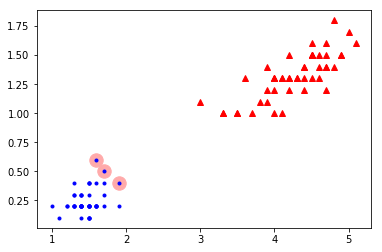

In [77]:
plt.plot(x[:, 0][y == 0], x[:,1][y == 0], 'b.')
plt.plot(x[:, 0][y == 1], x[:,1][y == 1], 'r^')
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
plot_svc_decision_boundary(LSV, 4,6)

## Moon Data

In [85]:
x, y = datasets.make_moons(noise = 0.15 , random_state= 42)

In [170]:
def plot_data(x, y ): 
    plt.plot(x[:, 0][y == 0], x[:,1][y == 0], 'bs')
    plt.plot(x[:, 0][y == 1], x[:,1][y == 1], 'g^')
    axes = [x[:, 0].min(), x[:, 0].max(), x[:, 1].min(), x[:, 1].max()]
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel(r'$X1$' , fontsize = 15)
    plt.ylabel(r'$Y1$', fontsize = 15, rotation = 0)
    


Text(0.5,1,'Moon - Data (before Analysis) \n')

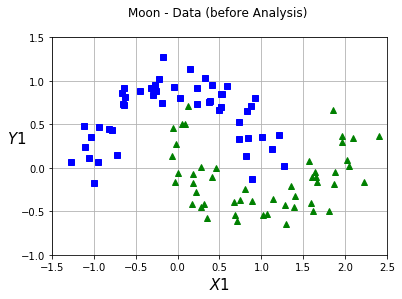

In [101]:
plot_data(x, y , [-1.5,2.5, -1, 1.5])
plt.title('Moon - Data (before Analysis) \n')

In [102]:
from sklearn.svm import LinearSVC

In [151]:
polynomial = PolynomialFeatures(degree = 3)
linear_svc = LinearSVC(C = 10 , loss = 'hinge', random_state= 42)
poly_svm_clf = Pipeline([
                        ('Polynomial', polynomial),
                        ('Linear_SVC', linear_svc)
                        ])
poly_svm_clf.fit(x, y)

In [167]:
def plot_density_fun(x, y , model):
    h = 0.02 #stepsize in mesh 
    x0 = np.arange(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5 , 0.2)
    x1 = np.arange(x[: , 1].min() - 0.5, x[:, 1].max() + 0.5 , 0.2) 
    xx, yy = np.meshgrid(x0, x1)
    X = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(X).ravel().reshape(xx.shape)
    y_decision_fun = model.decision_function(X).ravel().reshape(xx.shape)
    plt.contourf(xx, yy , y_pred)
    plt.contourf(xx,yy, y_decision_fun)

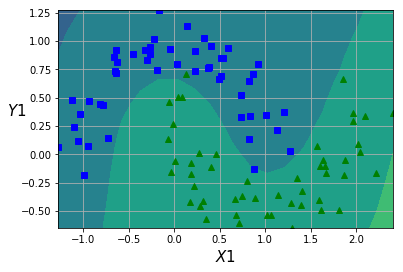

In [171]:
plot_density_fun(x, y , poly_svm_clf)
plot_data(x, y)